<h1><center> Assignment 1 </center></h1>
<h3> Names:</h3> 
<h5> Ahmed Mahmoud Fawzi 1170523 </h5> 
<h5>Youssef Amr Ahmed   1170157 </h5>


In [1]:
from sklearn.datasets import make_classification
import numpy as np
import sys
import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


<h4>The training algorithm function is responsible for training the model to be able to classify elements according to features and results entered by the user.</h4>
<h4>Beside taking features, results, weights and the learning rate user want to begin with as an input.</h4>
<h4>The function also takes the type of algorithim you want your model to be train with "whether online or batch percepton".</h4> 

In [2]:
def Training_Algorithm(X,Y,Algorithm,Weights,LearningRate=1): 
    DataLength=len(X) #number of train data
    Epsilon=sys.float_info.epsilon #small number near zero
    wchanges=0 #a varibale that counts the number of weight changes happened  
    DeltaChanges=[]
    Epochscounter=0 #count the number epoch until norm of Delta become less than Epsilon
    while(Epochscounter == 0 or norm(Delta,1)>Epsilon): #break loop when norm of Delta is less than Epsilon 
        i=0 
        Epochscounter+=1
        Delta = np.zeros(len(X[0])) #intialize delta array with zeros with length equals that of the weights "number of features + bias"        
        while(i<DataLength): #loop over all entered data
            Prediction=Weights.dot(X[i]) #make a prediction of the result 
            if(Y[i]*Prediction<=0): #compare prediction to the actual result "train you model furthermore" 
                YX=Y[i]*X[i]
                Delta=Delta-(YX) #update delta 
                if(Algorithm=="Online Traning"): #update weights after each data "if you want to make with online algorithim" 
                    Delta=Delta/DataLength
                    Weights=Weights-(LearningRate*Delta) #update weights
                    wchanges+=1

            i+=1
        if(Algorithm=="Batch Perceptron"): #update weights after each epoch "if you want to make with Batch Perceptron"
            Delta=Delta/DataLength
            Weights=Weights-(LearningRate*Delta) #update weights
            wchanges+=1
        DeltaChanges.append(norm(Delta, 1))
    return Weights,Delta,wchanges,Epochscounter,DeltaChanges  
        

<h4>Function that add bias of ones to features array</h4>

In [3]:
def AddBias(X):
    totalLength=len(X) 
    dataLength=len(X[0])
    for i in range (totalLength): 
        X[i].append(1) #add bias to each entered data
    X = np.array(X)
    X = X.reshape(totalLength,dataLength+1) # reshaping to be required Output 
    return X

<h4>Function that generates random weights "from a to b" for array of size equal number of features + bias </h4>

In [4]:
def GenerateWeights(a,b,n):
    W=[]
    for i in range(0,n):
        r = np.random.uniform(a,b)
        W.append(r)
    W=np.asarray(W)
    return W

<h4>Function that classify data to their classes depending on the input trained data</h4>

In [5]:
def Predict_classification (data,W,bias=True):
    prediction=[]
    if(bias):
        data=AddBias(data) #add bias to data
    else:
        data=np.array(data) #work with the data without adding a bias if user doesnot want to add bias
    for j in data:
        prediction.append(np.sign(W.dot(j))) #result of features "depending on the training" 
    prediction=np.asarray(prediction)
    return prediction

<h6>Function to Print Comparisons between the Online and Batch Algorithms. It takes the outputs from the training Algorithm and then prints the outputs</h6>

In [6]:
def Compare_Data(W1,Delta1,wchanges1,Epochs1,Dchange1,W2,Delta2,wchanges2,Epochs2,Dchange2):
    print("Weights From Batch Algorithm:",W1,"\n")
    print("Weights From Online Algorithm:",W2,"\n")
    print("Deltas From Batch Algorithm: ",Delta1,"\n")
    print("Deltas From Online Algorithm: ",Delta2,"\n")
    print("Number of Epochs to achieve zero error in Batch Algorithm: ",Epochs1,"\n")
    print("Number of Epochs to achieve zero error in Online Algorithm: ",Epochs2,"\n")
    print("Number of times the weights changes in Batch Algorithm: ",wchanges1,"\n")
    print("Number of times the weights changes in Online Algorithm: ",wchanges2,"\n")



<h6> This Function Calls Make Classification Function to generate x and y and Mask the Ydata</h6>

In [7]:
def MakeClassification_and_MaskY():
    newx, newy = make_classification(25, n_features=2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1) #generate random data and random results
    mask_for_y = newy == 0 
    newy[mask_for_y] = -1
    return newx,newy

<h6> A function implemented that is responsible to split and shuffle the data returning xtrain,xtest,ytrain,ytest </h6>

In [8]:
def ShuffleandSplit(newx,newy,trainsize):
    shuffledIdxs = np.arange(newx.shape[0])
    random.shuffle(shuffledIdxs)     # shuffle the indecies
    x = newx[shuffledIdxs,:]         #make the shuffled x
    y= newy[shuffledIdxs]           # shuffle the y also like the x values
    xtrain=x[:int(trainsize*len(x))]    # make the train equals to 0-traininputsize in percentage*totallength
    ytrain=y[:int(trainsize*len(y))]
    xtest=x[int(trainsize*len(x)):]   # make the test equals to from traininputsize in percentage*totallength-totallength
    ytest=y[int(trainsize*len(y)):]
    return xtrain,xtest,ytrain,ytest

<h6> Draw Model Line Function </h6>

In [9]:
def DrawModelLine(NW,Hx,Hy):
    m = -NW[0]/NW[1]   #Calculate the slope from the input weight
    sorteddata=np.sort(Hx[:,0], axis=-1, kind=None, order=None) 
    yd=m*sorteddata # Compute the y by multiplying the weight with the x[:,0]( horizontal x axis )
    plt.plot(sorteddata , yd, 'k', lw=1) #plot the y with respect to the horizontal axis
    plt.scatter(Hx[:, 0], Hx[:, 1], marker='o', c=Hy, s=25, edgecolor='k') 

<h1>Question 1 Data</h1>
<h4>This Block of codes is responsible to calculate the weights,Epochs and Weight,Delta changes and then compare these outputs from both the Batch Perceptron and Online Traning </h4>

[0.32857043 0.41570624]
Weights From Batch Algorithm: [ -5.92142957 516.29070624] 

Weights From Online Algorithm: [-0.09623426  9.00994453] 

Deltas From Batch Algorithm:  [0. 0.] 

Deltas From Online Algorithm:  [0. 0.] 

Number of Epochs to achieve zero error in Batch Algorithm:  2581 

Number of Epochs to achieve zero error in Online Algorithm:  51 

Number of times the weights changes in Batch Algorithm:  2581 

Number of times the weights changes in Online Algorithm:  153 



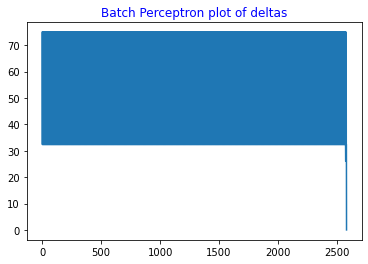

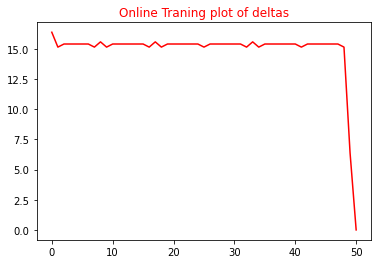

In [10]:
x=AddBias([[50], [55], [70], [80],[130], [150], [155],[160]])
y=np.array([1,1,1,1,-1,-1,-1,-1]) # change y data according to givens

Weight=GenerateWeights(-1,1,len(x[0]))  

W1,Delta1,wchanges1,Epochs1,Dchange1=Training_Algorithm(x,y,"Batch Perceptron",Weight)
W2,Delta2,wchanges2,Epochs2,Dchange2=Training_Algorithm(x,y,"Online Traning",Weight)
Compare_Data(W1,Delta1,wchanges1,Epochs1,Dchange1,W2,Delta2,wchanges2,Epochs2,Dchange2)

plt.figure(0)
plt.title("Batch Perceptron plot of deltas", color='b')
plt.plot(Dchange1)
plt.figure(1)
plt.title("Online Traning plot of deltas", color='r')
plt.plot(Dchange2,'r')


<h1>Question 4 Data </h1>
<h4>This Block of codes is responsible to calculate the weights,Epochs and Weight,Delta changes and then compare these outputs from both the Batch Perceptron and Online Traning </h4>

[0.1232204  0.1540346  0.18831003 0.76735325]
Weights From Batch Algorithm: [ 63.8732204   63.9040346  -95.43668997   0.76735325] 

Weights From Online Algorithm: [ 55.9044704   51.45286273 -87.96598684   0.42165012] 

Deltas From Batch Algorithm:  [0. 0. 0. 0.] 

Deltas From Online Algorithm:  [0. 0. 0. 0.] 

Number of Epochs to achieve zero error in Batch Algorithm:  5 

Number of Epochs to achieve zero error in Online Algorithm:  7 

Number of times the weights changes in Batch Algorithm:  5 

Number of times the weights changes in Online Algorithm:  12 



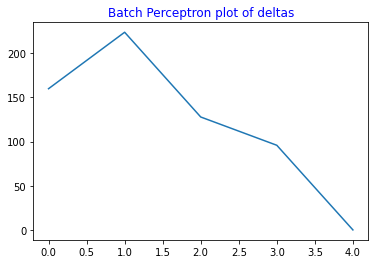

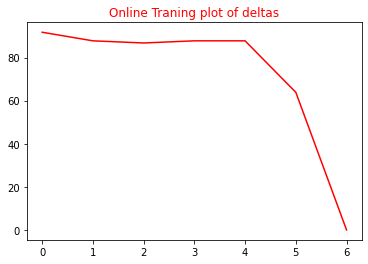

In [11]:
x=AddBias([[0,0,0], [255, 0, 0], [0, 255, 0], [0, 0, 255],[255, 255, 0], [0, 255, 255], [255, 0, 255],[255, 255, 255]])
y=np.array([1, 1, 1, -1, 1, -1, -1, 1]) # change y data according to givens

Weight=GenerateWeights(-1,1,len(x[0]))  

W1,Delta1,wchanges1,Epochs1,Dchange1=Training_Algorithm(x,y,"Batch Perceptron",Weight)
W2,Delta2,wchanges2,Epochs2,Dchange2=Training_Algorithm(x,y,"Online Traning",Weight)
Compare_Data(W1,Delta1,wchanges1,Epochs1,Dchange1,W2,Delta2,wchanges2,Epochs2,Dchange2)
plt.figure(0)
plt.title("Batch Perceptron plot of deltas",color='b')
plt.plot(Dchange1)
plt.figure(1)
plt.title("Online Traning plot of deltas", color='r')
plt.plot(Dchange2,'r')


<h1> Make Classification Generated Data </h1>

In [12]:
newx,newy=MakeClassification_and_MaskY()
X_train, X_test, y_train, y_test=ShuffleandSplit(newx,newy,0.75)

[ 0.6842627  -0.22282108]
Weights From Batch Algorithm: [0.24105663 0.38156371] 

Weights From Online Algorithm: [0.1017569  0.27827858] 

Deltas From Batch Algorithm:  [0. 0.] 

Deltas From Online Algorithm:  [0. 0.] 

Number of Epochs to achieve zero error in Batch Algorithm:  3 

Number of Epochs to achieve zero error in Online Algorithm:  4 

Number of times the weights changes in Batch Algorithm:  3 

Number of times the weights changes in Online Algorithm:  9 



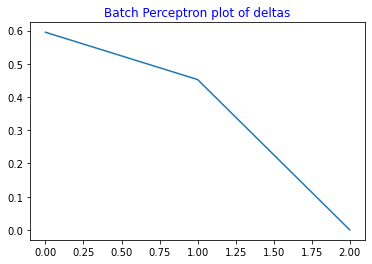

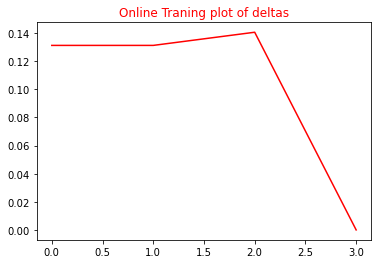

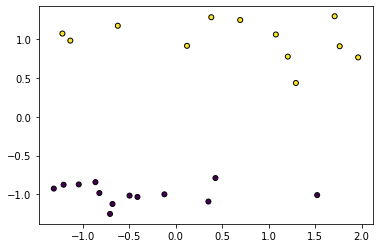

In [13]:
Weight=GenerateWeights(-1,1,len(newx[0]))  
NW1,NDelta1,Nwchanges1,NEpochs1,NDchange1=Training_Algorithm(X_train,y_train,"Batch Perceptron",Weight)
NW2,NDelta2,Nwchanges2,NEpochs2,NDchange2=Training_Algorithm(X_train,y_train,"Online Traning",Weight)
Compare_Data(NW1,NDelta1,Nwchanges1,NEpochs1,NDchange1,NW2,NDelta2,Nwchanges2,NEpochs2,NDchange2)
plt.figure(0)
plt.title("Batch Perceptron plot of deltas",color='b')
plt.plot(NDchange1)
plt.figure(1)
plt.title("Online Traning plot of deltas",color='r')
plt.plot(NDchange2,'r')
plt.figure(2)
plt.scatter(newx[:, 0], newx[:, 1], marker='o', c=newy, s=25, edgecolor='k') 

<h1>Accuracy Compute for both Algorithms</h1>

In [14]:
ModelPrediction=Predict_classification(X_test,NW1,False)
print("Batch Algorithm Model Prediciton Accuracy:",accuracy_score(y_test, ModelPrediction))
ModelPrediction=Predict_classification(X_test,NW2,False)
print("Online Algorithm Model Prediciton Accuracy:",accuracy_score(y_test, ModelPrediction))

Batch Algorithm Model Prediciton Accuracy: 1.0
Online Algorithm Model Prediciton Accuracy: 1.0


<h1>Model Line Plot</h1>

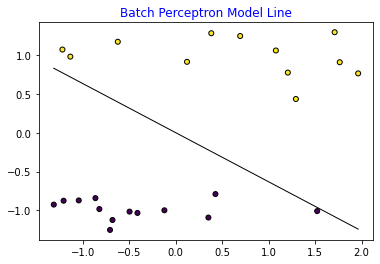

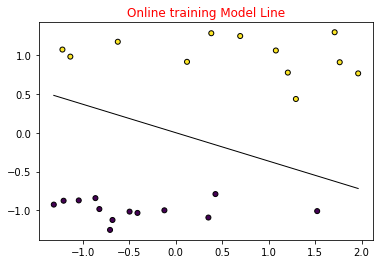

In [15]:
plt.figure(0)
plt.title("Batch Perceptron Model Line",color='b')
DrawModelLine(NW1,newx,newy)
plt.figure(1)
plt.title("Online training Model Line",color='r')
DrawModelLine(NW2,newx,newy)